<a href="https://colab.research.google.com/github/reza-pishva/RNN-projects/blob/main/clustering_main_trans_g12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [277]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import matplotlib.cm as cm
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.losses import mse
from sklearn.decomposition import PCA
from tensorflow.keras import backend as K
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
import warnings # Ignore specific warnings
warnings.filterwarnings("ignore")

In [278]:
df1 = pd.read_excel('output_main_trans_g12.xlsx')

In [279]:
df1.head(10)

,AssetID_8312,AssetID_8313,AssetID_8314,date
0,70.0,68.0,7.0,2021-04-01 10:28:06
1,54.0,50.0,8.0,2021-06-17 15:56:36
2,50.0,55.0,7.0,2021-06-18 16:31:36
3,52.0,48.0,7.0,2021-06-19 16:22:57
4,68.0,64.0,7.0,2021-06-20 17:18:03
5,64.0,62.0,7.0,2021-06-20 22:11:48
6,64.0,60.0,7.0,2021-06-21 04:44:23
7,72.0,70.0,7.0,2021-06-21 10:43:22
8,73.0,69.0,7.0,2021-06-21 15:59:06
9,70.0,65.0,7.0,2021-06-21 21:58:51


In [280]:
df1.columns

Index(['AssetID_8312', 'AssetID_8313', 'AssetID_8314', 'date'], dtype='object')

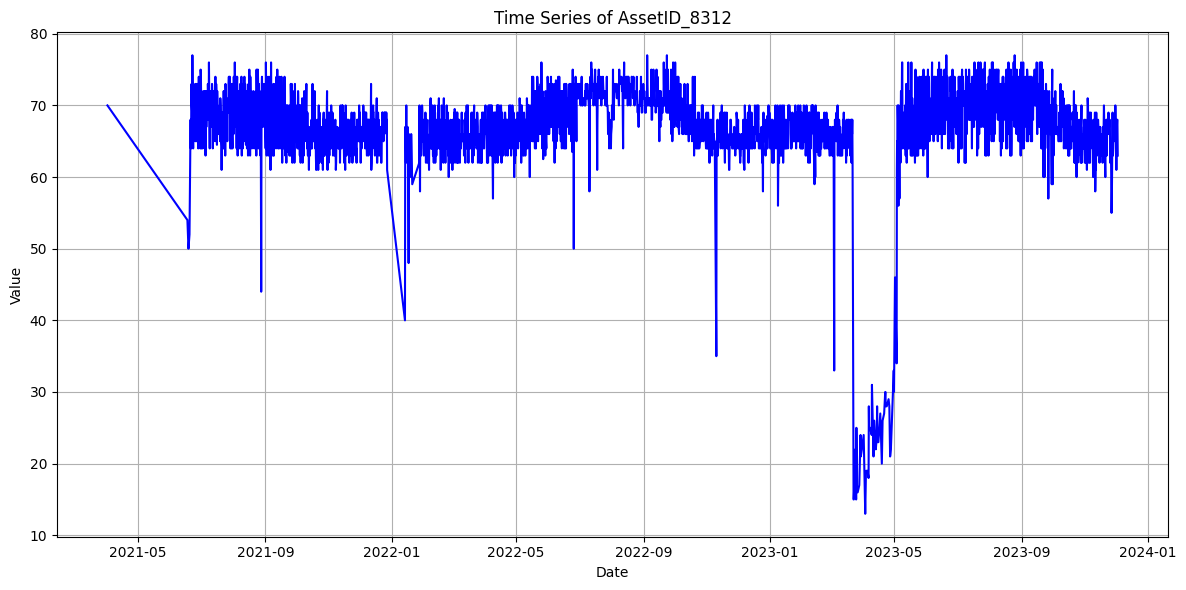

In [281]:
# تبدیل ستون تاریخ به datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# رسم نمودار برای AssetID_8312
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['AssetID_8312'], color='blue')
plt.title('Time Series of AssetID_8312')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

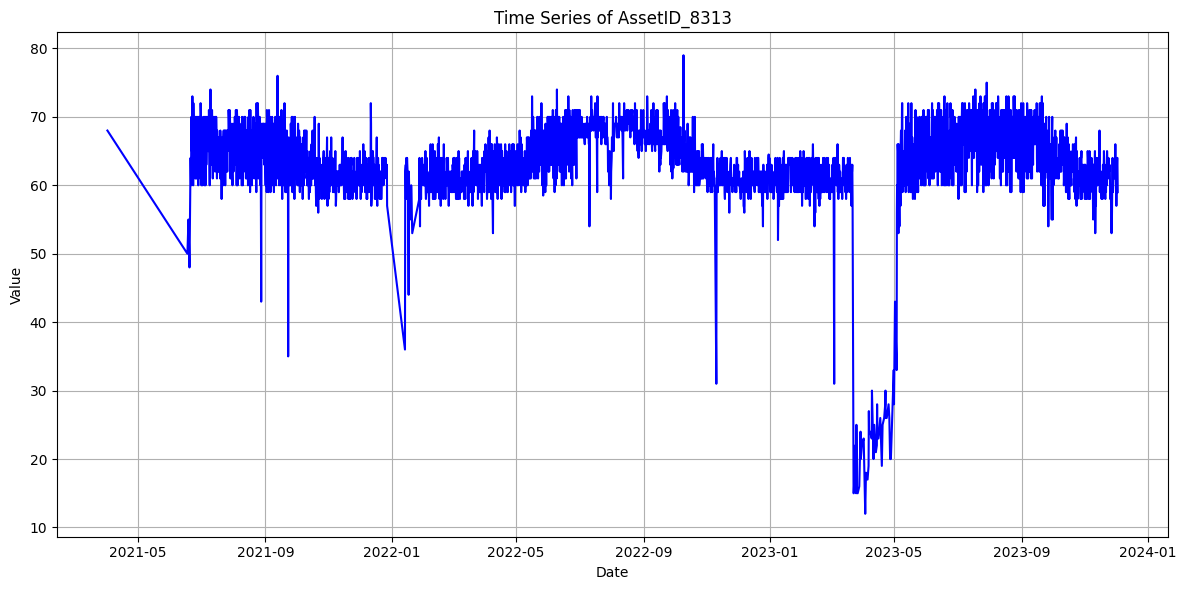

In [282]:
# تبدیل ستون تاریخ به datetime
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

# رسم نمودار برای AssetID_8312
plt.figure(figsize=(12, 6))
plt.plot(df1['date'], df1['AssetID_8313'], color='blue')
plt.title('Time Series of AssetID_8313')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

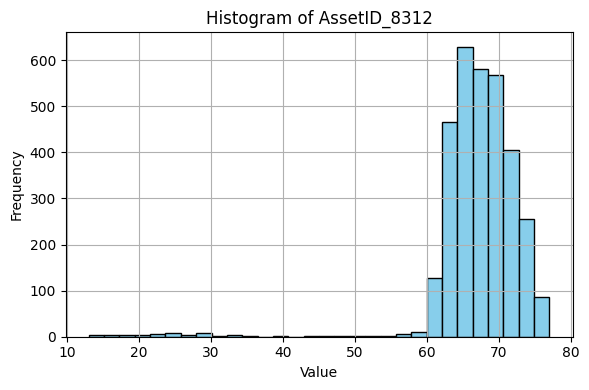

In [283]:
# رسم هیستوگرام برای AssetID_8312
plt.figure(figsize=(6, 4))
plt.hist(df1['AssetID_8312'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of AssetID_8312')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


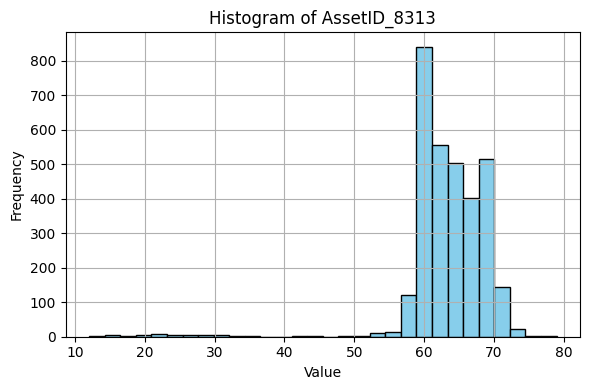

In [284]:
# رسم هیستوگرام برای AssetID_8313
plt.figure(figsize=(6, 4))
plt.hist(df1['AssetID_8313'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of AssetID_8313')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

In [285]:
from sklearn.preprocessing import StandardScaler

# انتخاب ستون‌ها برای استانداردسازی
data_to_scale = df1[['AssetID_8312', 'AssetID_8313']]

# استانداردسازی داده‌ها
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# تبدیل خروجی به دیتافریم با همان نام ستون‌ها
scaled_df = pd.DataFrame(scaled_data, columns=['AssetID_8312', 'AssetID_8313'])

# نمایش ۵ ردیف اول
print(scaled_df.head())


   AssetID_8312  AssetID_8313
0      0.439433      0.746723
1     -2.076942     -2.115437
2     -2.706035     -1.320393
3     -2.391489     -2.433455
4      0.124886      0.110688


In [286]:
scaled_df_clean = scaled_df.dropna()

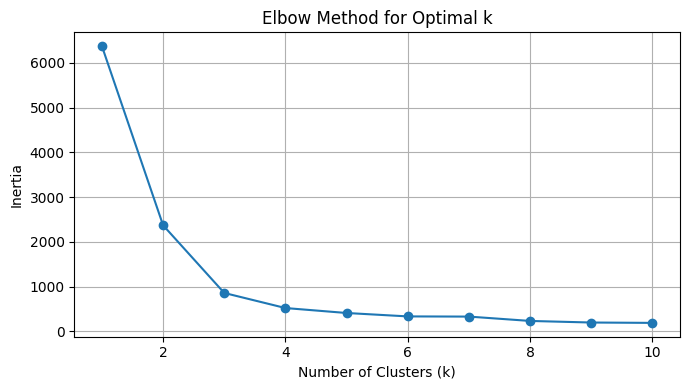

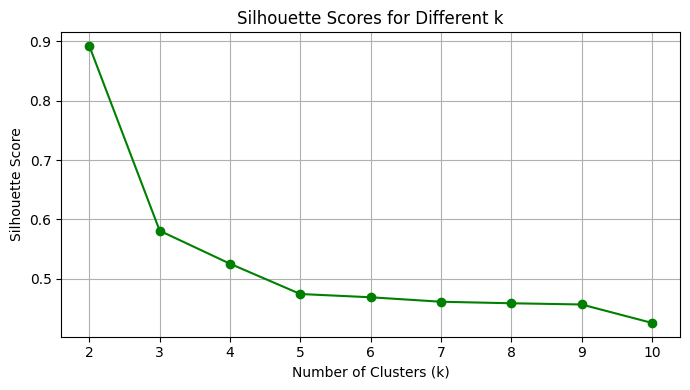

In [287]:
X = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]

# Elbow Method
inertias = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7, 4))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Silhouette Scores
silhouette_scores = []
k_range_sil = range(2, 11)
for k in k_range_sil:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(7, 4))
plt.plot(k_range_sil, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


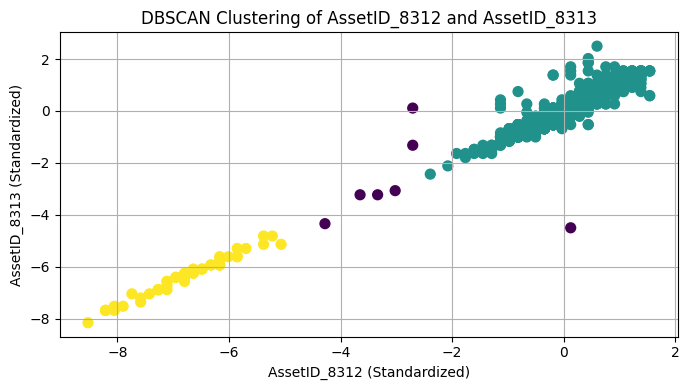

In [288]:
# اجرای DBSCAN روی داده‌های استانداردشده
dbscan = DBSCAN(eps=0.7, min_samples=5)
labels = dbscan.fit_predict(scaled_df_clean)

# اضافه کردن برچسب خوشه به دیتافریم
scaled_df_clean['cluster'] = labels

# رسم نتایج خوشه‌بندی
plt.figure(figsize=(7, 4))
plt.scatter(scaled_df_clean['AssetID_8312'], scaled_df_clean['AssetID_8313'], c=labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering of AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()

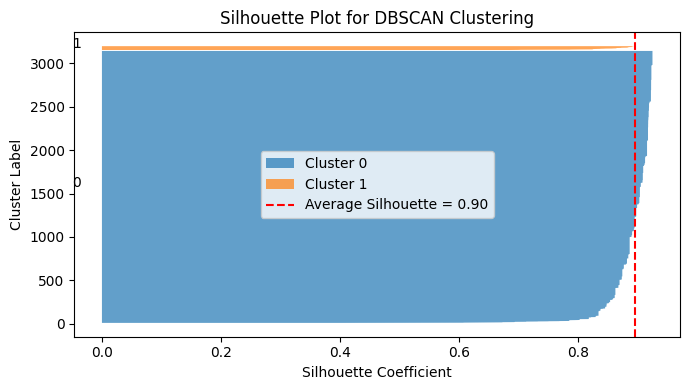

Average Silhouette Score for DBSCAN (excluding noise): 0.90


In [289]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# حذف نقاط پرت (برچسب -1)
mask = scaled_df_clean['cluster'] != -1
X_clustered = scaled_df_clean.loc[mask, ['AssetID_8312', 'AssetID_8313']]
labels_clustered = scaled_df_clean.loc[mask, 'cluster']

# Check if there are at least 2 clusters after removing noise
if len(np.unique(labels_clustered)) >= 2:
    # محاسبه امتیاز سیلوئت برای هر نمونه
    silhouette_vals = silhouette_samples(X_clustered, labels_clustered)
    avg_score = silhouette_score(X_clustered, labels_clustered)

    # رسم نمودار سیلوئت
    plt.figure(figsize=(7, 4))
    y_lower = 10
    for i in np.unique(labels_clustered):
        ith_cluster_silhouette_vals = silhouette_vals[labels_clustered == i]
        ith_cluster_silhouette_vals.sort()
        size_cluster_i = ith_cluster_silhouette_vals.shape[0]
        y_upper = y_lower + size_cluster_i

        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_vals,
                          alpha=0.7, label=f'Cluster {i}')

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(avg_score, color="red", linestyle="--", label=f"Average Silhouette = {avg_score:.2f}")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster Label")
    plt.title("Silhouette Plot for DBSCAN Clustering")
    plt.legend()
    plt.tight_layout()
    plt.show()

    print(f"Average Silhouette Score for DBSCAN (excluding noise): {avg_score:.2f}")
else:
    print("DBSCAN resulted in only one cluster (excluding noise points). Silhouette score cannot be calculated.")

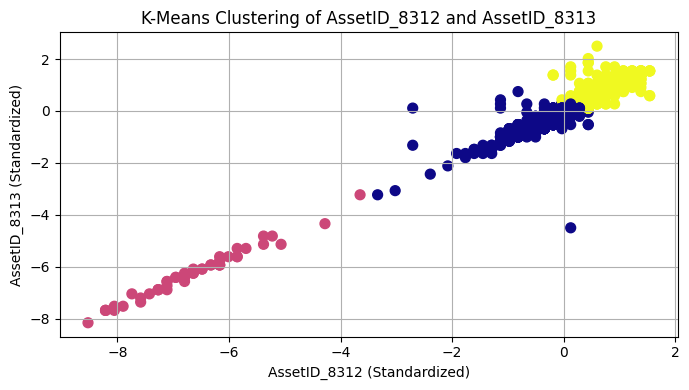

In [290]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# اجرای K-Means با 3 خوشه (قابل تنظیم)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب خوشه به دیتافریم
scaled_df_clean['kmeans_cluster'] = kmeans_labels

# رسم نتایج خوشه‌بندی
plt.figure(figsize=(7, 4))
plt.scatter(
    scaled_df_clean['AssetID_8312'],
    scaled_df_clean['AssetID_8313'],
    c=kmeans_labels,
    cmap='plasma',
    s=50
)
plt.title('K-Means Clustering of AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()


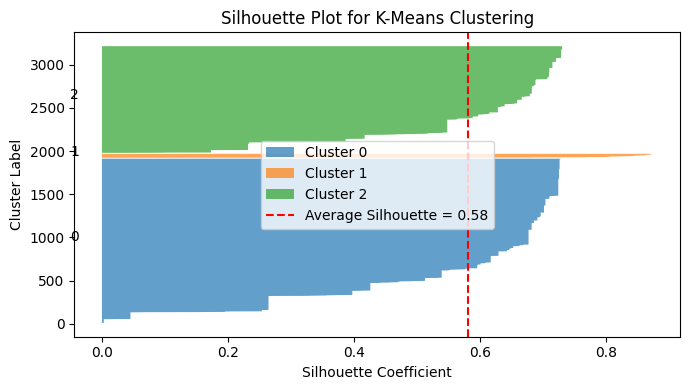

In [291]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

# داده‌های ورودی و برچسب‌ها
X_kmeans = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]
labels_kmeans = scaled_df_clean['kmeans_cluster']

# محاسبه امتیاز سیلوئت برای هر نمونه
silhouette_vals = silhouette_samples(X_kmeans, labels_kmeans)
avg_score = silhouette_score(X_kmeans, labels_kmeans)

# رسم نمودار
plt.figure(figsize=(7, 4))
y_lower = 10
for i in np.unique(labels_kmeans):
    ith_cluster_silhouette_vals = silhouette_vals[labels_kmeans == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7, label=f'Cluster {i}')

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(avg_score, color="red", linestyle="--", label=f"Average Silhouette = {avg_score:.2f}")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for K-Means Clustering")
plt.legend()
plt.tight_layout()
plt.show()


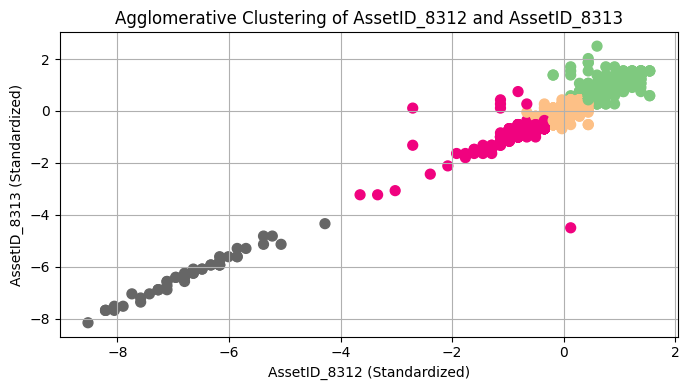

In [292]:
# اجرای خوشه‌بندی سلسله‌مراتبی با 3 خوشه (قابل تنظیم)
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب خوشه به دیتافریم
scaled_df_clean['agglo_cluster'] = agglo_labels

# رسم نتایج خوشه‌بندی
plt.figure(figsize=(7, 4))
plt.scatter(
    scaled_df_clean['AssetID_8312'],
    scaled_df_clean['AssetID_8313'],
    c=agglo_labels,
    cmap='Accent',
    s=50
)
plt.title('Agglomerative Clustering of AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()


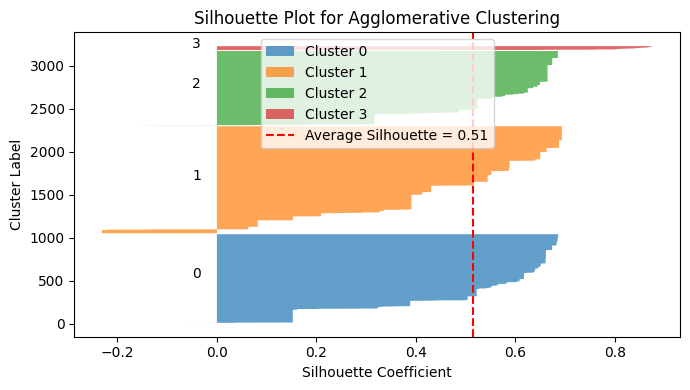

In [293]:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# داده‌های ورودی و برچسب‌ها
X_agglo = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]
labels_agglo = scaled_df_clean['agglo_cluster']

# محاسبه امتیاز سیلوئت برای هر نمونه
silhouette_vals = silhouette_samples(X_agglo, labels_agglo)
avg_score = silhouette_score(X_agglo, labels_agglo)

# رسم نمودار
plt.figure(figsize=(7, 4))
y_lower = 10
for i in np.unique(labels_agglo):
    ith_cluster_silhouette_vals = silhouette_vals[labels_agglo == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7, label=f'Cluster {i}')

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(avg_score, color="red", linestyle="--", label=f"Average Silhouette = {avg_score:.2f}")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for Agglomerative Clustering")
plt.legend()
plt.tight_layout()
plt.show()


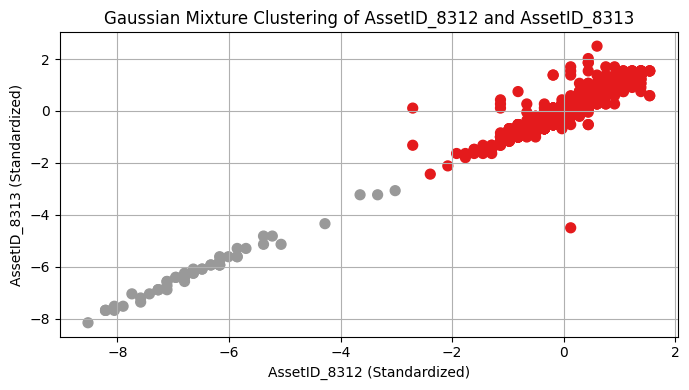

In [294]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# اجرای GMM با 3 خوشه (قابل تنظیم)
gmm = GaussianMixture(n_components=2, random_state=42)
gmm_labels = gmm.fit_predict(scaled_df_clean[['AssetID_8312', 'AssetID_8313']])

# اضافه کردن برچسب خوشه به دیتافریم
scaled_df_clean['gmm_cluster'] = gmm_labels

# رسم نتایج خوشه‌بندی
plt.figure(figsize=(7, 4))
plt.scatter(
    scaled_df_clean['AssetID_8312'],
    scaled_df_clean['AssetID_8313'],
    c=gmm_labels,
    cmap='Set1',
    s=50
)
plt.title('Gaussian Mixture Clustering of AssetID_8312 and AssetID_8313')
plt.xlabel('AssetID_8312 (Standardized)')
plt.ylabel('AssetID_8313 (Standardized)')
plt.grid(True)
plt.tight_layout()
plt.show()


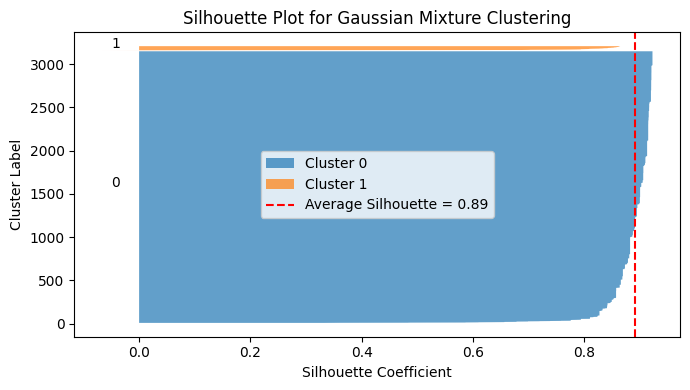

In [295]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# داده‌های ورودی و برچسب‌ها
X_gmm = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]
labels_gmm = scaled_df_clean['gmm_cluster']

# محاسبه امتیاز سیلوئت برای هر نمونه
silhouette_vals = silhouette_samples(X_gmm, labels_gmm)
avg_score = silhouette_score(X_gmm, labels_gmm)

# رسم نمودار
plt.figure(figsize=(7, 4))
y_lower = 10
for i in np.unique(labels_gmm):
    ith_cluster_silhouette_vals = silhouette_vals[labels_gmm == i]
    ith_cluster_silhouette_vals.sort()
    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_vals,
                      alpha=0.7, label=f'Cluster {i}')

    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(avg_score, color="red", linestyle="--", label=f"Average Silhouette = {avg_score:.2f}")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster Label")
plt.title("Silhouette Plot for Gaussian Mixture Clustering")
plt.legend()
plt.tight_layout()
plt.show()


In [296]:
X = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]

best_score = -1
best_params = {'eps': None, 'min_samples': None}

# محدوده پارامترها برای بررسی
eps_values = np.arange(0.3, 1.2, 0.1)
min_samples_values = range(3, 10)

# حلقه بررسی ترکیب‌های مختلف
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # حذف نقاط پرت (برچسب -1)
        mask = labels != -1
        if len(set(labels[mask])) < 2:
            continue  # نیاز به حداقل دو خوشه برای محاسبه سیلوئت

        score = silhouette_score(X[mask], labels[mask])
        print(f"eps={eps:.2f}, min_samples={min_samples}, silhouette={score:.4f}")

        if score > best_score:
            best_score = score
            best_params['eps'] = eps
            best_params['min_samples'] = min_samples

print("\n✅ بهترین پارامترها:")
print(f"eps = {best_params['eps']:.2f}")
print(f"min_samples = {best_params['min_samples']}")
print(f"بهترین امتیاز سیلوئت = {best_score:.4f}")


eps=0.30, min_samples=3, silhouette=0.1393
eps=0.30, min_samples=4, silhouette=0.8929
eps=0.30, min_samples=5, silhouette=0.8930
eps=0.30, min_samples=6, silhouette=0.8906
eps=0.30, min_samples=7, silhouette=0.8908
eps=0.30, min_samples=8, silhouette=0.8867
eps=0.40, min_samples=3, silhouette=0.3097
eps=0.40, min_samples=4, silhouette=0.8966
eps=0.40, min_samples=5, silhouette=0.8966
eps=0.40, min_samples=6, silhouette=0.8909
eps=0.40, min_samples=7, silhouette=0.8913
eps=0.40, min_samples=8, silhouette=0.8968
eps=0.40, min_samples=9, silhouette=0.8951
eps=0.50, min_samples=3, silhouette=0.7883
eps=0.50, min_samples=4, silhouette=0.8962
eps=0.50, min_samples=5, silhouette=0.8962
eps=0.50, min_samples=6, silhouette=0.8963
eps=0.50, min_samples=7, silhouette=0.8982
eps=0.50, min_samples=8, silhouette=0.8988
eps=0.50, min_samples=9, silhouette=0.8959
eps=0.60, min_samples=3, silhouette=0.7880
eps=0.60, min_samples=4, silhouette=0.8964
eps=0.60, min_samples=5, silhouette=0.8964
eps=0.60, m

In [297]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

X = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]

best_score = -1
best_k = None

# محدوده تعداد خوشه‌ها برای بررسی
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)

    score = silhouette_score(X, labels)
    print(f"k={k}, silhouette={score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

print("\n✅ بهترین تعداد خوشه:")
print(f"k = {best_k}")
print(f"بهترین امتیاز سیلوئت = {best_score:.4f}")


k=2, silhouette=0.8917
k=3, silhouette=0.5811
k=4, silhouette=0.5255
k=5, silhouette=0.4746
k=6, silhouette=0.4691
k=7, silhouette=0.4616
k=8, silhouette=0.4590
k=9, silhouette=0.4570
k=10, silhouette=0.4260

✅ بهترین تعداد خوشه:
k = 2
بهترین امتیاز سیلوئت = 0.8917


In [298]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np

X = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]

best_score = -1
best_k = None

# محدوده تعداد خوشه‌ها برای بررسی
k_range = range(2, 11)

for k in k_range:
    agglo = AgglomerativeClustering(n_clusters=k)
    labels = agglo.fit_predict(X)

    score = silhouette_score(X, labels)
    print(f"k={k}, silhouette={score:.4f}")

    if score > best_score:
        best_score = score
        best_k = k

print("\n✅ بهترین تعداد خوشه:")
print(f"k = {best_k}")
print(f"بهترین امتیاز سیلوئت = {best_score:.4f}")


k=2, silhouette=0.8936
k=3, silhouette=0.5680
k=4, silhouette=0.5147
k=5, silhouette=0.4723
k=6, silhouette=0.4756
k=7, silhouette=0.4623
k=8, silhouette=0.4586
k=9, silhouette=0.4268
k=10, silhouette=0.4244

✅ بهترین تعداد خوشه:
k = 2
بهترین امتیاز سیلوئت = 0.8936


In [299]:
from sklearn.ensemble import IsolationForest
import numpy as np

X = scaled_df_clean[['AssetID_8312', 'AssetID_8313']]

best_outlier_count = -1
best_params = {'contamination': None, 'n_estimators': None}

# محدوده پارامترها
contamination_values = np.arange(0.01, 0.2, 0.01)
n_estimators_values = [50, 100, 150]

for contamination in contamination_values:
    for n_estimators in n_estimators_values:
        iso = IsolationForest(contamination=contamination, n_estimators=n_estimators, random_state=42)
        preds = iso.fit_predict(X)

        outliers = np.sum(preds == -1)
        print(f"contamination={contamination:.2f}, n_estimators={n_estimators}, outliers={outliers}")

        if outliers > best_outlier_count:
            best_outlier_count = outliers
            best_params['contamination'] = contamination
            best_params['n_estimators'] = n_estimators

print("\n✅ بهترین پارامترها برای بیشترین نقاط پرت:")
print(f"contamination = {best_params['contamination']:.2f}")
print(f"n_estimators = {best_params['n_estimators']}")
print(f"تعداد نقاط پرت شناسایی‌شده = {best_outlier_count}")


contamination=0.01, n_estimators=50, outliers=32
contamination=0.01, n_estimators=100, outliers=24
contamination=0.01, n_estimators=150, outliers=31
contamination=0.02, n_estimators=50, outliers=64
contamination=0.02, n_estimators=100, outliers=64
contamination=0.02, n_estimators=150, outliers=63
contamination=0.03, n_estimators=50, outliers=94
contamination=0.03, n_estimators=100, outliers=96
contamination=0.03, n_estimators=150, outliers=96
contamination=0.04, n_estimators=50, outliers=128
contamination=0.04, n_estimators=100, outliers=114
contamination=0.04, n_estimators=150, outliers=118
contamination=0.05, n_estimators=50, outliers=145
contamination=0.05, n_estimators=100, outliers=156
contamination=0.05, n_estimators=150, outliers=156
contamination=0.06, n_estimators=50, outliers=176
contamination=0.06, n_estimators=100, outliers=192
contamination=0.06, n_estimators=150, outliers=192
contamination=0.07, n_estimators=50, outliers=224
contamination=0.07, n_estimators=100, outliers=